In [1]:
# Demo-ing the shelterbelt categorization pipeline

In [2]:
# Tree categories
from shelterbelts.indices.tree_categories import tree_categories, tree_categories_cmap, tree_categories_labels

In [3]:
tree_tif = '../data/g2_26729_binary_tree_cover_10m.tiff'  

# Optional parameters
outdir = '../outdir'
stub = 'shelter_indices'
min_patch_size=20
edge_size=3
max_gap_size=1

ds = tree_categories(tree_tif, outdir, stub, min_patch_size, edge_size, max_gap_size)

Saved: ../outdir/shelter_indices_categorised.tif
Saved: ../outdir/shelter_indices_categorised.png


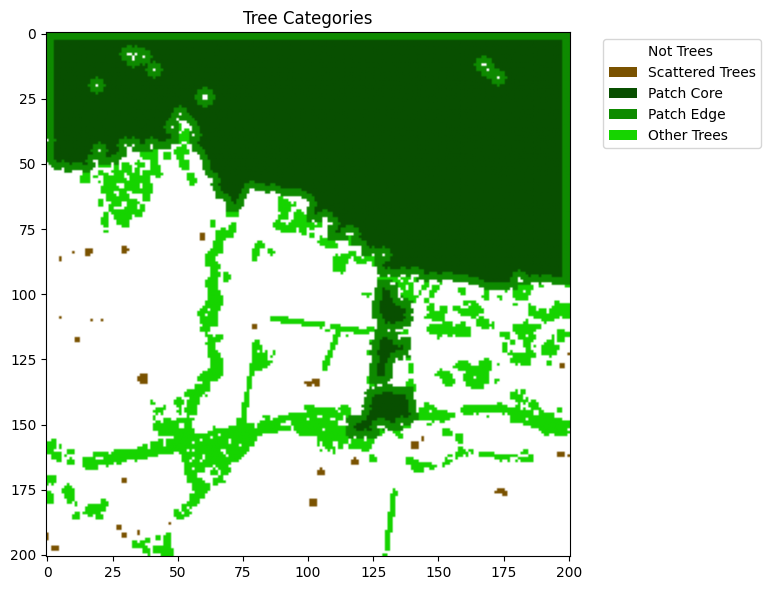

In [4]:
from shelterbelts.apis.worldcover import visualise_categories
visualise_categories(ds['tree_categories'], None, tree_categories_cmap, tree_categories_labels, "Tree Categories")

In [5]:
# Shelter categories
from shelterbelts.indices.shelter_categories import shelter_categories, shelter_categories_cmap, shelter_categories_labels

category_tif = '../outdir/shelter_indices_categorised.tif'

# Method 1: percentage tree cover
ds_density = shelter_categories(category_tif, outdir=outdir, stub='tree_density', distance_threshold=10, density_threshold=10)

# Method 2: single wind direction
wind_ds = '../outdir/g2_26729_barra_daily.nc'
ds_single = shelter_categories(category_tif, wind_ds, outdir=outdir, stub=stub, wind_method='MOST_COMMON', distance_threshold=10, wind_threshold=15)

# Method 3: Multiple wind directions
wind_ds = '../outdir/g2_26729_barra_daily.nc'
height_tif = '../outdir/g2_26729_canopy_height.tif'
ds_multiple = shelter_categories(category_tif, wind_ds, height_tif, outdir=outdir, stub='multiple_directions', wind_method='ANY', distance_threshold=10)

Saved: ../outdir/tree_density_shelter_categories.tif
Saved: ../outdir/tree_density_shelter_categories.png
Saved: ../outdir/shelter_indices_shelter_categories.tif
Saved: ../outdir/shelter_indices_shelter_categories.png
Saved: ../outdir/multiple_directions_shelter_categories.tif
Saved: ../outdir/multiple_directions_shelter_categories.png


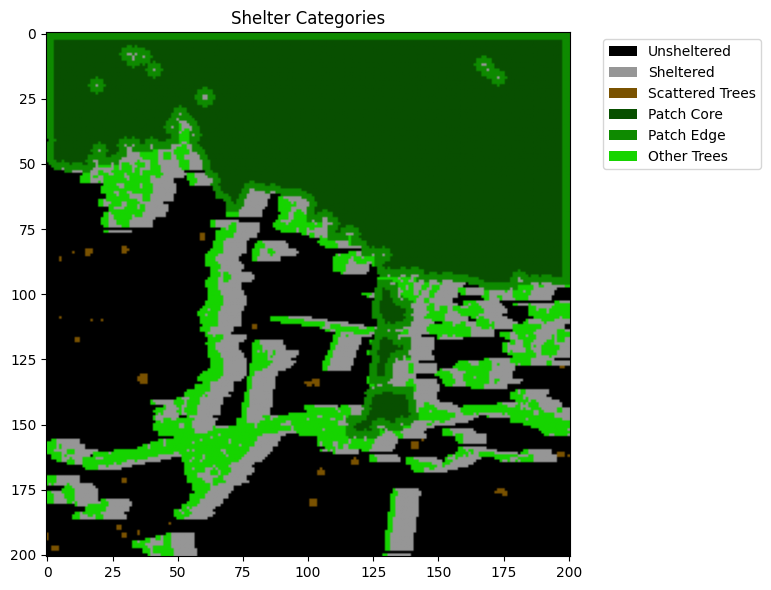

In [6]:
visualise_categories(ds_single['shelter_categories'], None, shelter_categories_cmap, shelter_categories_labels, "Shelter Categories")

In [7]:
# Worldcover categories
from shelterbelts.indices.cover_categories import cover_categories, cover_categories_cmap, cover_categories_labels

shelter_tif = '../outdir/shelter_indices_shelter_categories.tif'
worldcover_tif = '../outdir/g2_26729_worldcover.tif'

ds_cover = cover_categories(shelter_tif, worldcover_tif, outdir=outdir, stub=stub)

Saved: ../outdir/shelter_indices_cover_categories.tif
Saved: ../outdir/shelter_indices_cover_categories.png


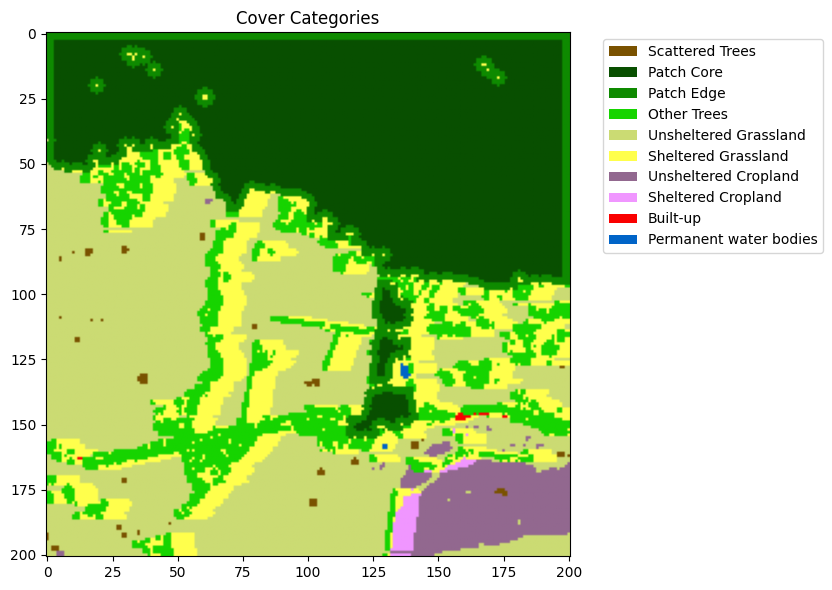

In [8]:
visualise_categories(ds_cover['cover_categories'], None, cover_categories_cmap, cover_categories_labels, "Cover Categories")

In [9]:
# Buffer categories
from shelterbelts.indices.buffer_categories import buffer_categories, buffer_categories_cmap, buffer_categories_labels

cover_tif = '../outdir/shelter_indices_cover_categories.tif'

# Just riparian buffers
hydrolines_tif = '../outdir/g2_26729_hydrolines.tif'
ds_hydrolines = buffer_categories(cover_tif, hydrolines_tif, outdir=outdir, stub='hydrolines', buffer_width=3)

# Riparian buffers and roads
roads_tif = '../outdir/g2_26729_roads.tif'
ds_roads = buffer_categories(cover_tif, hydrolines_tif, roads_tif=roads_tif, outdir=outdir, stub=stub, buffer_width=3)

# Riparian buffers and catchment boundaries (ridges)
gullies_tif = '../outdir/g2_26729_5m_gullies.tif'
ridges_tif = '../outdir/g2_26729_5m_ridges.tif'
ds_ridges = buffer_categories(cover_tif, gullies_tif, ridges_tif, outdir=outdir, stub='ridges', buffer_width=3)

Saved: ../outdir/hydrolines_buffer_categories.tif
Saved: ../outdir/hydrolines_buffer_categories.png
Saved: ../outdir/shelter_indices_buffer_categories.tif
Saved: ../outdir/shelter_indices_buffer_categories.png
Saved: ../outdir/ridges_buffer_categories.tif
Saved: ../outdir/ridges_buffer_categories.png


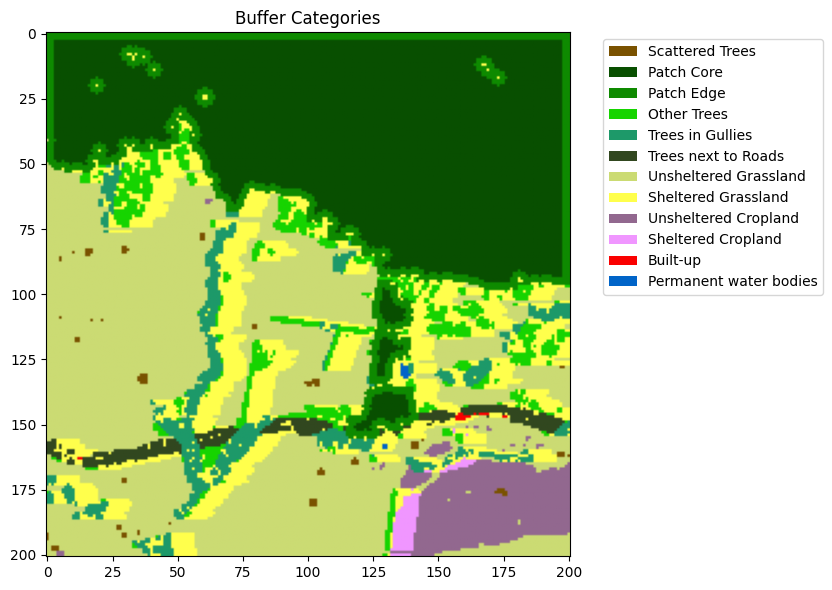

In [10]:
visualise_categories(ds_roads['buffer_categories'], None, buffer_categories_cmap, buffer_categories_labels, "Buffer Categories")

In [11]:
# Linear categories
from shelterbelts.indices.shelter_metrics import patch_metrics, class_metrics, linear_categories_cmap, linear_categories_labels, plot_clusters

buffer_tif = '../outdir/shelter_indices_buffer_categories.tif'
ds, df = patch_metrics(buffer_tif, outdir, stub)

cleaned_tif = '../outdir/shelter_indices_cleaned_categories.tif'
dfs = class_metrics(cleaned_tif, outdir, stub)

Saved: ../outdir/shelter_indices_labelled_categories.png
Saved: ../outdir/shelter_indices_patch_metrics.csv
Saved: ../outdir/shelter_indices_linear_categories.png
Saved: ../outdir/shelter_indices_linear_categories.tif
Saved: ../outdir/shelter_indices_labelled_categories.tif
Saved: ../outdir/shelter_indices_class_metrics.xlsx


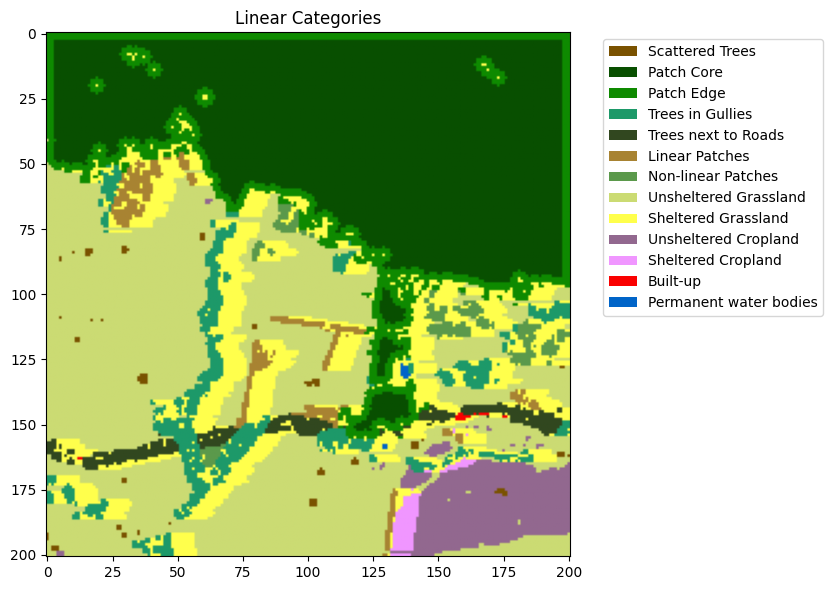

In [12]:
visualise_categories(ds['linear_categories'], None, linear_categories_cmap, linear_categories_labels, "Linear Categories")

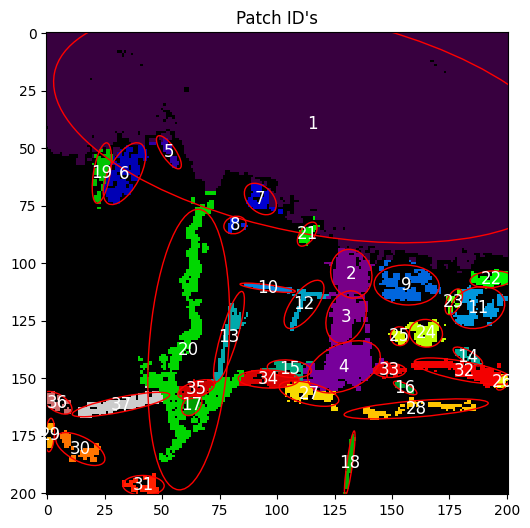

In [13]:
# Patch metrics
plot_clusters(ds['labelled_categories'].data, None)

In [14]:
df[:10]

,label,length,width,perimeter,area,orientation_degrees,category_id,category_name,len/width
0,1,228.502610,94.724104,934.464033,14897.0,78.711989,13,Patch with core,2.412296
1,2,21.512061,17.676842,91.941125,273.0,15.812335,13,Patch with core,1.216963
2,3,23.559603,16.545046,88.662951,251.0,-20.919484,13,Patch with core,1.423967
3,4,33.594446,19.762501,135.982756,457.0,-65.566241,13,Patch with core,1.699909
4,5,17.026345,5.947569,29.899495,40.0,34.519629,18,Linear Patches,2.862740
5,6,29.670531,13.553301,139.361436,239.0,-28.327680,18,Linear Patches,2.189174
6,7,16.172217,10.902292,59.177670,81.0,46.110784,19,Non-linear Patches,1.483378
7,8,9.818925,7.441097,24.106602,29.0,-73.228630,19,Non-linear Patches,1.319553
8,9,28.335293,17.345212,128.669048,208.0,86.943145,19,Non-linear Patches,1.633609
9,10,24.272224,2.583847,38.449747,47.0,82.527040,18,Linear Patches,9.393831


In [15]:
# Class metrics
for key in dfs:
    print(f"\n{key} stats:")
    print(dfs[key])


Overall stats:
                        category_id  pixel_count  percentage landcover_group
label                                                                       
Scattered Trees                  11          138    0.341576           Trees
Patch Core                       12        12734   31.519022           Trees
Patch Edge                       13         3115    7.710205           Trees
Trees in Gullies                 15         1802    4.460286           Trees
Trees next to Roads              17          726    1.796985           Trees
Linear Patches                   18          701    1.735106           Trees
Non-linear Patches               19          534    1.321749           Trees
Unsheltered Grassland            31        13687   33.877874       Grassland
Sheltered Grassland              32         4873   12.061583       Grassland
Unsheltered Cropland             41         1835    4.541967        Cropland
Sheltered Cropland               42          215    0.532165